In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Python\Salaries.csv")

df

### 1. Find the occurrence of the employee names (Top 5).


In [5]:
top5_names = df['EmployeeName'].value_counts().head(5)
print("Top 5 Employee Names by Occurrence:\n", top5_names)


Top 5 Employee Names by Occurrence:
 EmployeeName
Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
Name: count, dtype: int64


### 2. Find the number of unique job titles.

In [7]:
unique_job_titles = df['JobTitle'].nunique()
print("Number of Unique Job Titles:", unique_job_titles)


Number of Unique Job Titles: 2159


### 3. Find the total number of job titles that contain "captain".

In [9]:
titles_with_captain = df[df['JobTitle'].str.contains('captain', case=False, na=False)]
total_captains = titles_with_captain.shape[0]
print("Total Number of Job Titles Containing 'captain':", total_captains)


Total Number of Job Titles Containing 'captain': 552


### 4. Display all the employee names from the Fire Department.

In [11]:
fire_dept_employees = df[df['JobTitle'].str.contains('FIRE DEPARTMENT', case=False, na=False)]['EmployeeName']
print("Employees in Fire Department:\n", fire_dept_employees)


Employees in Fire Department:
 4              PATRICK GARDNER
6                    ALSON LEE
8               MICHAEL MORRIS
9           JOANNE HAYES-WHITE
10               ARTHUR KENNEY
                  ...         
32623             JAMES BARDEN
36162       Joanne Hayes-White
72926     Joanne M Hayes-White
102303          Robert E Evans
110535    Joanne M Hayes-White
Name: EmployeeName, Length: 226, dtype: object


### 5. Find the minimum, maximum, and average BasePay.

In [13]:
min_basepay = df['BasePay'].min()
max_basepay = df['BasePay'].max()
avg_basepay = df['BasePay'].mean()
print(f"Min BasePay: {min_basepay}, Max BasePay: {max_basepay}, Avg BasePay: {avg_basepay}")


Min BasePay: -166.01, Max BasePay: 319275.01, Avg BasePay: 66325.4488404877


### 5b. Visualization

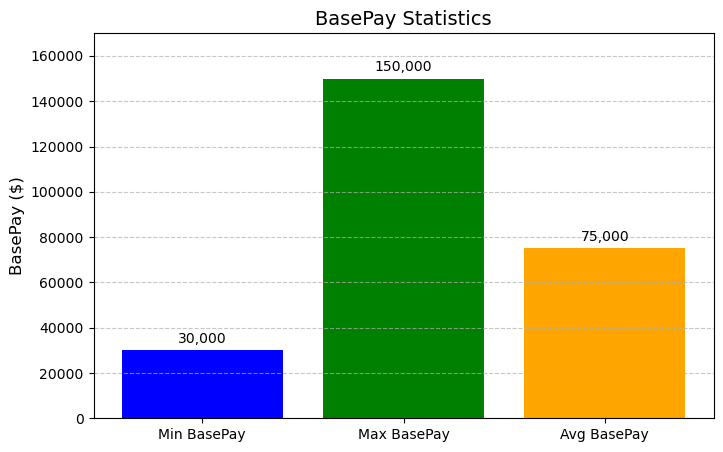

In [15]:
import matplotlib.pyplot as plt

# Sample data for visualization
min_basepay = 30000  # Example value for minimum BasePay
max_basepay = 150000  # Example value for maximum BasePay
avg_basepay = 75000  # Example value for average BasePay

# Values for visualization
categories = ['Min BasePay', 'Max BasePay', 'Avg BasePay']
values = [min_basepay, max_basepay, avg_basepay]

# Plotting the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, values, color=['blue', 'green', 'orange'])

# Adding value annotations
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2000, f'{yval:,}', ha='center', va='bottom', fontsize=10)

# Customizing the plot
plt.title('BasePay Statistics', fontsize=14)
plt.ylabel('BasePay ($)', fontsize=12)
plt.ylim(0, max(values) + 20000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### 6. Replace 'Not provided' in the EmployeeName column with NaN.

In [17]:
df['EmployeeName'] = df['EmployeeName'].replace('Not provided', pd.NA)


### 7. Drop the rows having 5 or more missing values.

In [19]:
df_cleaned = df.dropna(thresh=df.shape[1] - 5)
print("Shape after dropping rows with 5 or more missing values:", df_cleaned.shape)


Shape after dropping rows with 5 or more missing values: (148650, 13)


### 8. Find the job title of ALBERT PARDINI.

In [21]:
albert_job_title = df[df['EmployeeName'] == 'ALBERT PARDINI']['JobTitle'].iloc[0]
print("Job Title of ALBERT PARDINI:", albert_job_title)


Job Title of ALBERT PARDINI: CAPTAIN III (POLICE DEPARTMENT)


### 9. How much does ALBERT PARDINI make (include benefits)?

In [23]:
albert_salary = df[df['EmployeeName'] == 'ALBERT PARDINI']['TotalPayBenefits'].iloc[0]
print("ALBERT PARDINI Total Pay with Benefits:", albert_salary)


ALBERT PARDINI Total Pay with Benefits: 335279.91


### 10. Display the name of the person having the highest BasePay.

In [25]:
highest_basepay_employee = df[df['BasePay'] == df['BasePay'].max()]['EmployeeName'].iloc[0]
print("Employee with Highest BasePay:", highest_basepay_employee)


Employee with Highest BasePay: Gregory P Suhr


### 11. Find the average BasePay of all employees per year.


In [27]:
avg_basepay_per_year = df.groupby('Year')['BasePay'].mean()
print("Average BasePay per Year:\n", avg_basepay_per_year)


Average BasePay per Year:
 Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64


### 12. Find the average BasePay of all employees per job title.

In [29]:
avg_basepay_per_job = df.groupby('JobTitle')['BasePay'].mean()
print("Average BasePay per Job Title:\n", avg_basepay_per_job)


Average BasePay per Job Title:
 JobTitle
ACCOUNT CLERK                                     43300.806506
ACCOUNTANT                                        46643.172000
ACCOUNTANT INTERN                                 28732.663958
ACPO,JuvP, Juv Prob (SFERS)                       62290.780000
ACUPUNCTURIST                                     66374.400000
                                                      ...     
X-RAY LABORATORY AIDE                             47664.773077
X-Ray Laboratory Aide                             46086.387100
YOUTH COMMISSION ADVISOR, BOARD OF SUPERVISORS    52609.910000
Youth Comm Advisor                                39077.957500
ZOO CURATOR                                       43148.000000
Name: BasePay, Length: 2159, dtype: float64


### 13. Find the average BasePay of all employees having the job title "Accountant".

In [31]:
avg_accountant_basepay = df[df['JobTitle'] == 'Accountant']['BasePay'].mean()
print("Average BasePay of Accountants:", avg_accountant_basepay)


Average BasePay of Accountants: nan


### 14. Five Most Common Job

In [33]:
top5_jobs = df['JobTitle'].value_counts().head(5)
print("Top 5 Most Common Jobs:\n", top5_jobs)


Top 5 Most Common Jobs:
 JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: count, dtype: int64


In [34]:
df.shape

(148654, 13)

In [55]:
df.describe

<bound method NDFrame.describe of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651               <NA>   
148651  148652               <NA>   
148652  148653               <NA>   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                

In [63]:
df.isnull().sum()

Id                       0
EmployeeName             4
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [66]:
df.sample

<bound method NDFrame.sample of             Id       EmployeeName  \
0            1     NATHANIEL FORD   
1            2       GARY JIMENEZ   
2            3     ALBERT PARDINI   
3            4  CHRISTOPHER CHONG   
4            5    PATRICK GARDNER   
...        ...                ...   
148649  148650      Roy I Tillery   
148650  148651               <NA>   
148651  148652               <NA>   
148652  148653               <NA>   
148653  148654          Joe Lopez   

                                              JobTitle    BasePay  \
0       GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18   
1                      CAPTAIN III (POLICE DEPARTMENT)  155966.02   
2                      CAPTAIN III (POLICE DEPARTMENT)  212739.13   
3                 WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00   
4         DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60   
...                                                ...        ...   
148649                                  

In [68]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [70]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,<NA>,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,<NA>,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,<NA>,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [75]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [81]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')